In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
seed = sum([3, 15, 13, 16, 1, 19])
np.random.seed(seed)
num_samples = 7214
num_folds = 10

/Users/nlarusstone/.virtualenvs/bbcache/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def cnf_mat(preds, true):
    # true down, preds across
    true.name = 'True'
    preds.name = 'Preds'
    cnf = pd.crosstab(true, preds)
    print cnf
    tp = cnf.loc[1, 1]
    fp = cnf.loc[0, 1]
    fn = cnf.loc[1, 0]
    tn = cnf.loc[0, 0]
    print 'TPR: {0}'.format(float(tp) / (tp + fn))
    print 'FPR: {0}'.format(float(fp) / (fp + tn))
    print 'TP: {0}, FP: {1}, FN: {2}, TN: {3}'.format(tp, fp, fn, tn)
    print confusion_matrix(true, preds)
    print classification_report(true, preds)
    return [tp, fp, fn, tn]

def calc_rates(samps, pred_arr, true_arr, compas_arr=None):
    preds = pred_arr.loc[samps.astype(bool)]
    compas = compas_arr.loc[samps.astype(bool)]
    true = true_arr.loc[samps.astype(bool)]
    print 'CORELS'
    corels_cnf = cnf_mat(preds, true)
    print compas.shape, true.shape
    print 'COMPAS'
    compas_cnf = cnf_mat(compas, true)
    print compas_cnf[1]
    return corels_cnf, compas_cnf

In [15]:
bin = pd.read_csv('../data/compas.csv')
bin

,Age=18-20,Age=18-22,Age=18-25,Age=24-30,Age=24-40,Age>=30,Age<=40,Age<=45,Gender=Male,Race=African-American,...,Juvenile-Crimes=0,Juvenile-Crimes=1-3,Juvenile-Crimes>3,Juvenile-Crimes>5,Prior-Crimes=0,Prior-Crimes=1-3,Prior-Crimes>3,Prior-Crimes>5,Current-Charge-Degree=Misdemeanor,Recidivate-Within-Two-Years
0,0,0,0,0,0,1,1,1,1,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,1,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,1,1,0,1,0,...,1,0,0,0,0,0,1,1,0,1
7,0,0,0,0,0,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
8,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
9,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1


In [40]:
for i in range(num_folds):
    fname = '../logs/for-compas_{0}_train.out-curious_lb-with_prefix_perm_map-minor-removed=none-max_num_nodes=100000000-c=0.0050000-v=10-f=1000-opt.txt'.format(i)
    #fname = '../logs/for-compas_{0}_train.out-curious_lb-with_prefix_perm_map-minor-removed=none-max_num_nodes=10000000-c=0.0050000-v=10-f=1000-opt.txt'.format(i)
    with open(fname, 'r') as f:
        line = f.readlines()
        print line

['{age:23-25,priors:2-3}~1;{sex:Male,age:21-22}~1;{age:18-20}~1;{priors:>3}~1;default~0']
['{age:23-25,priors:2-3}~1;{age:18-20}~1;{priors:>3}~1;{sex:Male,age:21-22}~1;default~0']
['{sex:Male,age:21-22}~1;{age:23-25,priors:2-3}~1;{age:18-20}~1;{priors:>3}~1;default~0']
['{age:23-25,priors:2-3}~1;{priors:>3}~1;{sex:Male,age:21-22}~1;{age:18-20}~1;default~0']
['{age:23-25,priors:2-3}~1;{age:18-20}~1;{sex:Male,age:21-22}~1;{priors:>3}~1;default~0']
['{age:23-25,priors:2-3}~1;{sex:Male,age:21-22}~1;{age:18-20}~1;{priors:>3}~1;default~0']
['{sex:Male,age:21-22}~1;{age:23-25,priors:2-3}~1;{age:18-20}~1;{priors:>3}~1;default~0']
['{age:23-25,priors:2-3}~1;{age:18-20}~1;{sex:Male,age:21-22}~1;{priors:>3}~1;default~0']
['{age:18-20}~1;{priors:>3}~1;{age:23-25,priors:2-3}~1;{sex:Male,age:21-22}~1;default~0']
['{age:18-20}~1;{sex:Male,age:21-22}~1;{age:23-25,priors:2-3}~1;{priors:>3}~1;default~0']


In [39]:
for i in range(num_folds):
    fname = '../logs/for-compas_{0}_train.out-curious_lb-with_prefix_perm_map-minor-removed=none-max_num_nodes=100000000-c=0.0050000-v=10-f=1000-opt.txt'.format(i)
    #fname = '../logs/for-compas_{0}_train.out-curious_lb-with_prefix_perm_map-minor-removed=none-max_num_nodes=10000000-c=0.0050000-v=10-f=1000-opt.txt'.format(i)
    with open(fname, 'r') as f:
        line = f.readlines()
        print line

['{age:23-25,priors:2-3}~1;{sex:Male,age:21-22}~1;{age:18-20}~1;{priors:>3}~1;default~0']
['{age:23-25,priors:2-3}~1;{age:18-20}~1;{priors:>3}~1;{sex:Male,age:21-22}~1;default~0']
['{sex:Male,age:21-22}~1;{age:23-25,priors:2-3}~1;{age:18-20}~1;{priors:>3}~1;default~0']
['{age:23-25,priors:2-3}~1;{priors:>3}~1;{sex:Male,age:21-22}~1;{age:18-20}~1;default~0']
['{age:23-25,priors:2-3}~1;{age:18-20}~1;{sex:Male,age:21-22}~1;{priors:>3}~1;default~0']
['{age:23-25,priors:2-3}~1;{sex:Male,age:21-22}~1;{age:18-20}~1;{priors:>3}~1;default~0']
['{sex:Male,age:21-22}~1;{age:23-25,priors:2-3}~1;{age:18-20}~1;{priors:>3}~1;default~0']
['{age:23-25,priors:2-3}~1;{age:18-20}~1;{sex:Male,age:21-22}~1;{priors:>3}~1;default~0']
['{age:18-20}~1;{priors:>3}~1;{age:23-25,priors:2-3}~1;{sex:Male,age:21-22}~1;default~0']
['{age:18-20}~1;{sex:Male,age:21-22}~1;{age:23-25,priors:2-3}~1;{priors:>3}~1;default~0']


In [22]:
def analyze_data(train=True):
    binary = pd.read_csv('../data/compas-binary.csv')
    np.random.seed(seed)
    splits = np.split(np.random.permutation(num_samples / num_folds * num_folds), num_folds)
    compas = pd.read_csv('../compas/compas-scores-two-years.csv')
    compas_scores = compas['decile_score']
    compas_preds = (compas_scores > 4).astype(int)
    labels = ['Black CORELS', 'Black COMPAS', 'White CORELS', 'White COMPAS']
    white_corels, white_compas, black_corels, black_compas = [], [], [], []
    train_or_test = 'train' if train else 'test'
    for i in range(num_folds):
        print i
        fname = '../logs/for-compas_{0}_train.out-curious_lb-with_prefix_perm_map-minor-removed=none-max_num_nodes=10000000-c=0.0100000-v=100-f=1000-opt.txt'.format(i)
        with open(fname, 'r') as f:
            line = f.readline()
            opt = map(lambda x: x.split('~'), line.split(';'))
            print opt
        
        if train:
            split_i = np.concatenate([splits[j] for j in range(num_folds) if (j != i)])
        else:
            split_i = splits[i]
        print split_i
        bin_i = binary.loc[split_i].reset_index(drop=True).T
        compas_i = compas_preds.loc[split_i].reset_index(drop=True)
        black = bin_i.loc['Race=African-American:True']
        white = bin_i.loc['Race=Caucasian:True']

        nrules = 0
        with open('../data/CrossValidation/compas_{0}_{1}.out'.format(i, train_or_test)) as f:
            line = f.readline()
            nrules = len(line.split()) - 1
        out = pd.read_csv('../data/CrossValidation/compas_{0}_{1}.out'.format(i, train_or_test), sep=' ', names=['Rule'] + range(nrules))
        label = pd.read_csv('../data/CrossValidation/compas_{0}_{1}.label'.format(i, train_or_test), sep=' ', names=['Rule'] + range(nrules))
        out.set_index('Rule', inplace=True)
        label.set_index('Rule', inplace=True)

        captured = set()
        preds = []
        for (rule, pred) in opt[:-1]:
            cappd = out.ix[rule] == 1
            unfiltered_cappd = out.T[cappd].index
            filtered_cappd = set(unfiltered_cappd).difference(captured)
            preds += map(lambda x: (x, pred), filtered_cappd)
            captured = captured.union(filtered_cappd)

        # Handle default rule
        _, def_pred = opt[-1]
        preds += [(x, def_pred) for x in set(range(nrules)).difference(captured)]
        sorted_preds = sorted(preds, key=lambda x: x[0])
        pred_arr = pd.Series(map(lambda x: int(x[1]), sorted_preds))
        true_arr = label.iloc[1, :]

        print 'BLACK'
        black_corels_cnf, black_compas_cnf = calc_rates(black, pred_arr, true_arr, compas_arr=compas_i)
        print 'WHITE'
        white_corels_cnf, white_compas_cnf = calc_rates(white, pred_arr, true_arr, compas_arr=compas_i)

        black_corels.append(black_corels_cnf)
        black_compas.append(black_compas_cnf)
        white_corels.append(white_corels_cnf)
        white_compas.append(white_compas_cnf)
    algs = zip(labels, [black_corels, black_compas, white_corels, white_compas])
    return algs

In [23]:
algs = analyze_data(train=True)

0
[['{sex:Male,juvenile-crimes:>0}', '1'], ['{priors:>3}', '1'], ['default', '0']]
[2304 4798  900 ..., 1738 4917 2883]
BLACK
CORELS
Preds     0     1
True             
0      1109   514
1       687  1015
TPR: 0.596357226792
FPR: 0.316697473814
TP: 1015, FP: 514, FN: 687, TN: 1109
[[1109  514]
 [ 687 1015]]
             precision    recall  f1-score   support

          0       0.62      0.68      0.65      1623
          1       0.66      0.60      0.63      1702

avg / total       0.64      0.64      0.64      3325

(3325,) (3325,)
COMPAS
Preds    0     1
True            
0      899   724
1      481  1221
TPR: 0.717391304348
FPR: 0.446087492298
TP: 1221, FP: 724, FN: 481, TN: 899
[[ 899  724]
 [ 481 1221]]
             precision    recall  f1-score   support

          0       0.65      0.55      0.60      1623
          1       0.63      0.72      0.67      1702

avg / total       0.64      0.64      0.64      3325

724
WHITE
CORELS
Preds     0    1
True            
0      1089  253

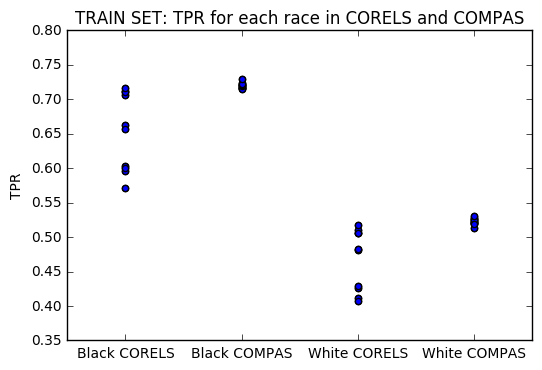

In [27]:
def tpr(l):
    return map(lambda x: float(x[0]) / (x[0] + x[2]), l)
x = [[i] * num_folds for i in range(len(algs))]
y = [tpr(a[1]) for a in algs]
labels = [l[0] for l in algs]
plt.scatter(x, y)
plt.xticks(range(len(algs)), labels)
plt.ylabel('TPR')
plt.title('TRAIN SET: TPR for each race in CORELS and COMPAS')
plt.show()

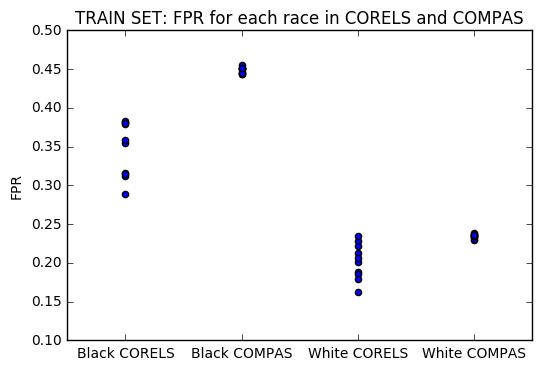

In [28]:
def fpr(l):
    return map(lambda x: float(x[1]) / (x[1] + x[3]), l)
x_fp = [[i] * num_folds for i in range(len(algs))]
y_fp = [fpr(a[1]) for a in algs]
labels = [l[0] for l in algs]
plt.scatter(x_fp, y_fp)
plt.xticks(range(len(algs)), labels)
plt.ylabel('FPR')
plt.title('TRAIN SET: FPR for each race in CORELS and COMPAS')
plt.show()

In [29]:
def stats(l):
    print 'TP, FP, FN, TN'
    print 'Means:', np.mean(l, axis=0)
    print 'Std deviations:', np.std(l, axis=0)
for a in algs:
    print a[0]
    stats(a[1])

Black CORELS
TP, FP, FN, TN
Means: [ 1118.3   560.3   592.6  1053.4]
Std deviations: [ 97.53773629  53.20159772  88.66701754  57.42159872]
Black COMPAS
TP, FP, FN, TN
Means: [ 1232.1   724.5   478.8   889.2]
Std deviations: [ 10.61555463   7.83900504   8.36420947   6.89637586]
White CORELS
TP, FP, FN, TN
Means: [  406.4   270.5   463.   1068.7]
Std deviations: [ 35.31345353  28.876461    38.69625305  32.69877674]
White COMPAS
TP, FP, FN, TN
Means: [  454.5   314.1   414.9  1025.1]
Std deviations: [ 4.41021541  4.15812458  7.81600921  6.36317531]


In [ ]:
# tp, fp, fn, tn
# FPR: float(fp) / (fp + tn)
# TPR: float(tp) / (tp + fn)

In [ ]:
white.sum() + black.sum()

In [ ]:
white.sum()

In [ ]:
pred_arr.sum()

In [ ]:
compas_preds.sum()